In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline



In [18]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head())

# Load the target values (MEDV) from the CSV file
target_values = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", usecols=[-1], names=['MEDV'])

# Add the target values to the DataFrame
data['MEDV'] = target_values

# Now you have the target values added to the DataFrame

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


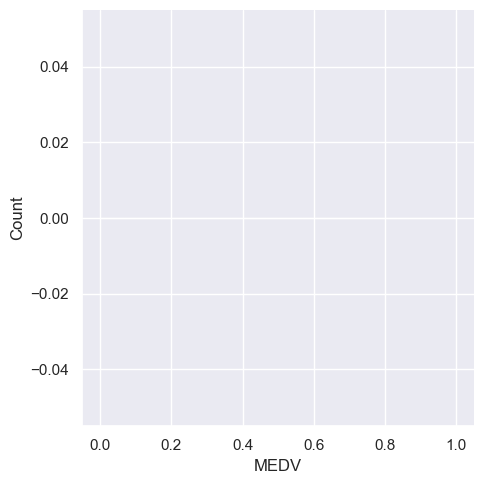

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data['MEDV'], bins=30, kde=False)
plt.show()

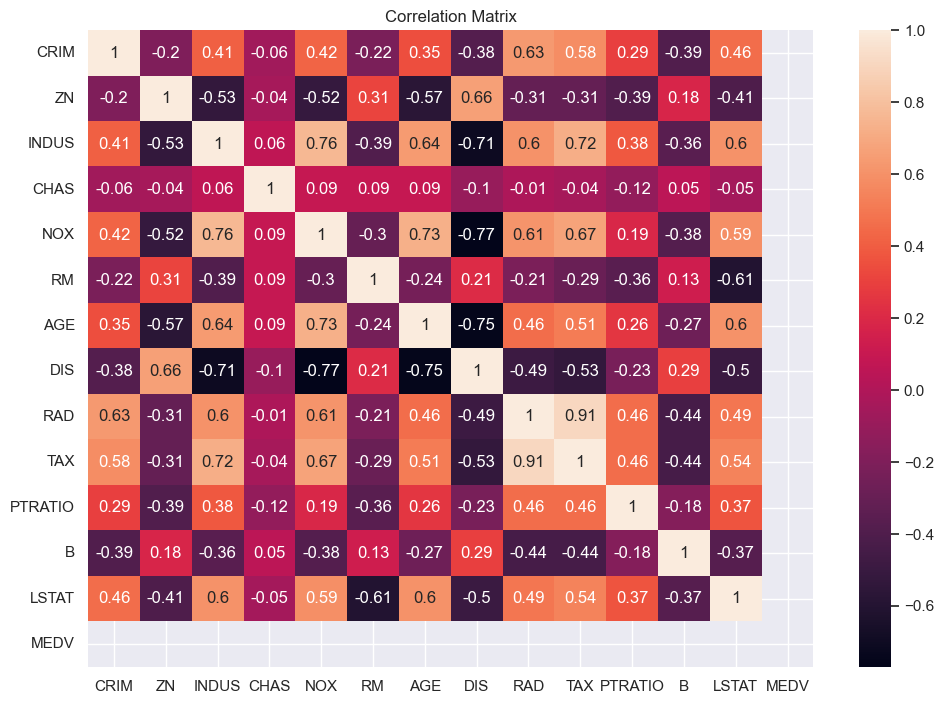

In [26]:
# Calculate the correlation matrix
correlation_matrix = data.corr().round(2)

# Plot the correlation matrix using a heatmap
sns.heatmap(data=correlation_matrix, annot=True)

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

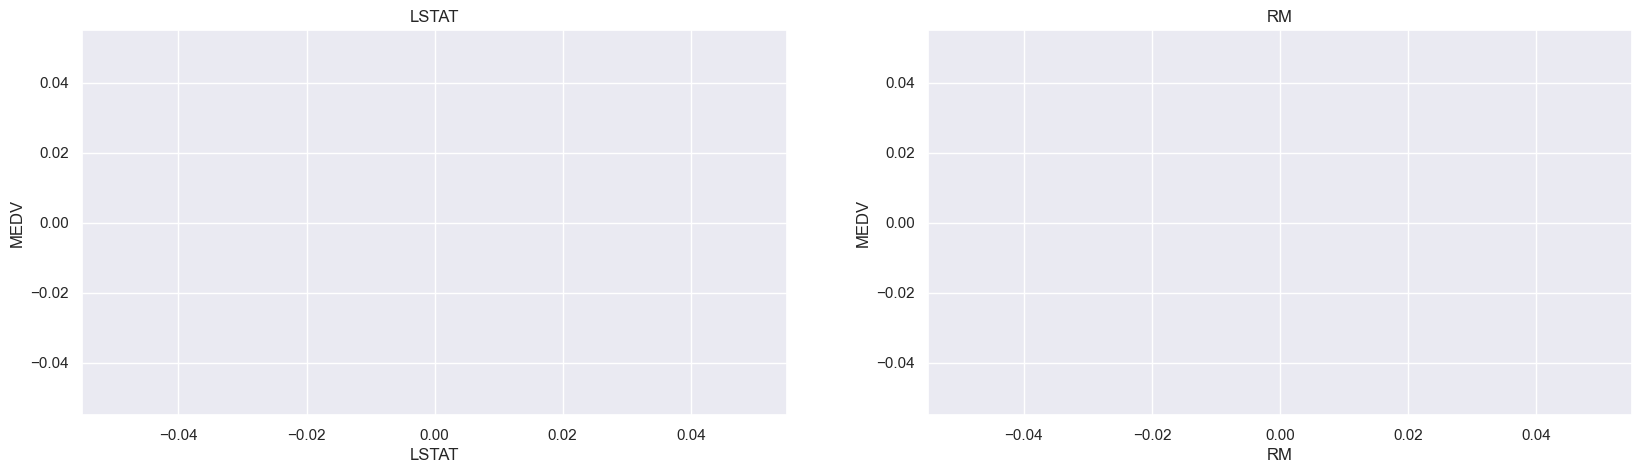

In [27]:


# Set the figure size
plt.figure(figsize=(20, 5))

# Define features and target variable
features = ['LSTAT', 'RM']
target = data['MEDV']

# Plot each feature against the target variable
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Show the plot
plt.show()


In [31]:
# Concatenate the 'LSTAT' and 'RM' columns
X = np.c_[data['LSTAT'], data['RM']]
Y = data['MEDV']

# Display the first few rows of the concatenated array
print(X[:5])

[[4.98  6.575]
 [9.14  6.421]
 [4.03  7.185]
 [2.94  6.998]
 [5.33  7.147]]


In [32]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data[['LSTAT', 'RM']]
Y = data['MEDV']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

# Display the shape of the training and testing sets
print(X_train.shape)
print(X_test.shape)

(404, 2)
(102, 2)


In [40]:
from sklearn.impute import SimpleImputer

# Create an imputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Impute missing values in the training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Remove rows with missing values from both features and target
missing_indices_train = np.isnan(X_train_imputed).any(axis=1)
X_train_imputed = X_train_imputed[~missing_indices_train]
Y_train = Y_train[~missing_indices_train]

missing_indices_test = np.isnan(X_test_imputed).any(axis=1)
X_test_imputed = X_test_imputed[~missing_indices_test]
Y_test = Y_test[~missing_indices_test]
print("X_train_imputed shape:", X_train_imputed.shape)
print("Y_train shape:", Y_train.shape)

# Now you can fit the linear regression model on the imputed training data
lin_model.fit(X_train_imputed, Y_train)


X_train_imputed shape: (404, 2)
Y_train shape: (404,)


ValueError: Input contains NaN

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the linear regression model
lin_model = LinearRegression()

# Fit the model to the training data
lin_model.fit(X_train_imputed, Y_train)

# Now that the model is fitted, we can proceed with evaluation
# model evaluation for training set
y_train_predict = lin_model.predict(X_train_imputed)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test_imputed)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


ValueError: Input contains NaN